In [2]:
## Basic imports 
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


['Training/female', 'Training/male']
['Validation/female', 'Validation/male']


<BarContainer object of 2 artists>

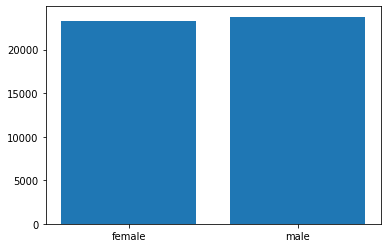

In [3]:
## Basic EDA
import matplotlib.pyplot as plt
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'gender_images/'

## basic directory structure

os.chdir(base_dir)
os.listdir()

## Deduce the labeles 

path_training = 'Training/'
path_validation = 'Validation/'

os.scandir(path_training)
subfolders = sorted([file.path for file in os.scandir(path_training) if file.is_dir()])
print(subfolders)


os.scandir(path_validation)
subfolders = sorted([file.path for file in os.scandir(path_validation) if file.is_dir()])
print(subfolders)

## Counting the number of images in each category


## To check the data imbalance between Male and female
data_size = {x: len(os.listdir(os.path.join(path_training, x))) for x in os.listdir(path_training)}

# Visualize the number of images per class(M or F)
plt.bar(data_size.keys(), data_size.values())






<BarContainer object of 2 artists>

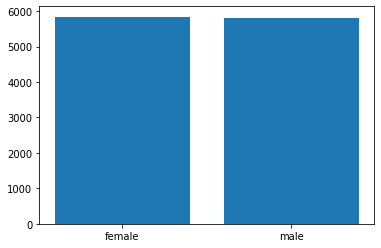

In [4]:
## To check the data imbalance between Male and female in Validation
data_size = {x: len(os.listdir(os.path.join(path_validation, x))) for x in os.listdir(path_validation)}

# Visualize the number of images per class(M or F)
plt.bar(data_size.keys(), data_size.values())

Female image dimension: (98, 76, 3)
Male image dimension (107, 77, 3)


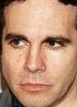

In [5]:
## Take a look at the data images and it's dimension
from matplotlib.image import imread
from PIL import Image
femalepic_path = path_training+'female/131435.jpg.jpg'
female_img = imread(femalepic_path) 
print("Female image dimension:",female_img.shape)

malepic_path = path_training+'male/090634.jpg.jpg'
male_img = imread(malepic_path) 
print("Male image dimension",male_img.shape)

## Display the image 


Image.open(malepic_path)


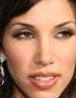

In [6]:
Image.open(femalepic_path)

In [7]:
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'gender_images/'

os.chdir(base_dir)
os.listdir()

path_training = 'Training/'
path_validation = 'Validation/'

batch_size = 128
## Kept the target size as the lower of two dimension (98,76)



train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')








validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.5)




train_generator = train_datagen.flow_from_directory(
    path_training,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True
)


validation_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset = 'training'
)

test_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset='validation'
)









Found 47035 images belonging to 2 classes.
Found 5822 images belonging to 2 classes.
Found 5821 images belonging to 2 classes.


In [8]:
from keras.optimizers.optimizer_v2.rmsprop import RMSProp
## Build the VGG model 

from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import RMSprop
##from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten, Dense
from keras.applications import VGG16


vgg=keras.applications.VGG16(include_top=False, pooling='avg', weights='imagenet',
input_shape=(98,76, 3))

##vgg=keras.applications.VGG16(include_top=False, pooling='avg', weights='imagenet',
##input_shape=(224,224, 3))
# Freeze the layers except the last 5
for layer in vgg.layers[:-5]:
 layer.trainable = False# Check the trainable status of the individual layers
for layer in vgg.layers:
 print(layer, layer.trainable)

 # Create the first model
model = Sequential()# Add the VGG16 convolutional base model
model.add(vgg)
 
# Add new layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='sigmoid'))

## Compile and Summary
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')
model.summary()




 # Create the second model
model1 = Sequential()# Add the VGG16 convolutional base model
model1.add(vgg)
 
# Add new layers
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(2, activation='sigmoid'))

## Compile and Summary
model1.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

58889256/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fd45bf04750> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45bee6210> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a637650> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fd45a637950> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a5a9950> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a5b4d50> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fd45bf10cd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a5bb890> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a5453d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a545490> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fd45be8d890> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd45a554d50> False
<keras.layers.convolutional.con

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 14,781,122
Trainable params: 7,145,602
Non-trainable params: 7,635,520
_________________________________________________________________


In [ ]:



rms_optimizer_model = 'rms_opt.h5'
checkpoint_callback = ModelCheckpoint(rms_optimizer_model,
                                     monitor='val_accuracy',
                                      verbose=2)


hist =  model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=25,
                           callbacks=[checkpoint_callback])                  





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/25
5/5 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.7328 
Epoch 1: saving model to rms_opt.h5
5/5 [==============================] - 1699s 412s/step - loss: 0.5442 - accuracy: 0.7328 - val_loss: 0.6226 - val_accuracy: 0.7750
Epoch 2/25
5/5 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8328 
Epoch 2: saving model to rms_opt.h5
5/5 [==============================] - 639s 148s/step - loss: 0.3963 - accuracy: 0.8328 - val_loss: 0.5884 - val_accuracy: 0.8358
Epoch 3/25
5/5 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8547 
Epoch 3: saving model to rms_opt.h5
5/5 [==============================] - 641s 148s/step - loss: 0.3561 - accuracy: 0.8547 - val_loss: 0.5511 - val_accuracy: 0.7334
Epoch 4/25
5/5 [==============================] - ETA: 0s - loss: 0.3548 - accuracy: 0.8641 
Epoch 4: saving model to rms_opt.h5
5/5 [==============================] - 634s 147s/step - loss: 0.3548 - accuracy: 0.8641 - val

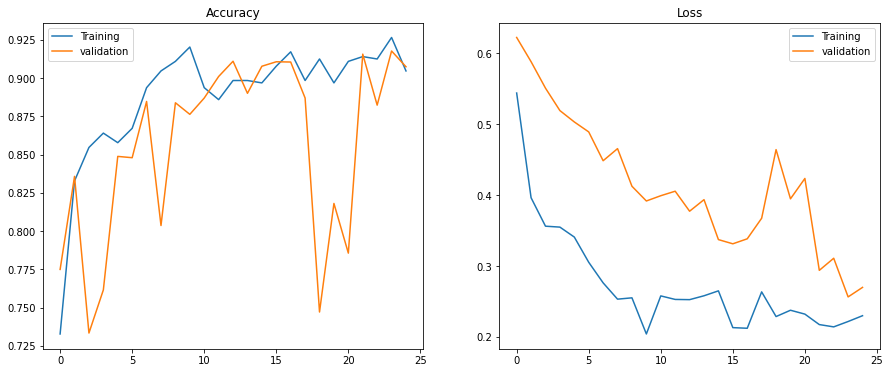

In [ ]:
import matplotlib.pyplot as plt
## plot the chart 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()




In [9]:
adam_optimizer_model = 'adam_opt.h5'
checkpoint_callback1 = ModelCheckpoint(adam_optimizer_model,
                                     monitor='val_accuracy',
                                      verbose=2)


hist1 =  model1.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=30,
                           callbacks=[checkpoint_callback1])                  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 0.7949 - accuracy: 0.5406 
Epoch 1: saving model to adam_opt.h5
5/5 [==============================] - 1805s 439s/step - loss: 0.7949 - accuracy: 0.5406 - val_loss: 0.6853 - val_accuracy: 0.5510
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 0.7007 - accuracy: 0.6109 
Epoch 2: saving model to adam_opt.h5
5/5 [==============================] - 646s 149s/step - loss: 0.7007 - accuracy: 0.6109 - val_loss: 0.6654 - val_accuracy: 0.6360
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.6242 - accuracy: 0.6922 
Epoch 3: saving model to adam_opt.h5
5/5 [==============================] - 643s 149s/step - loss: 0.6242 - accuracy: 0.6922 - val_loss: 0.6497 - val_accuracy: 0.7133
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 0.5898 - accuracy: 0.7234 
Epoch 4: saving model to adam_opt.h5
5/5 [==============================] - 640s 148s/step - loss: 0.5898 - accuracy: 0.7234 -

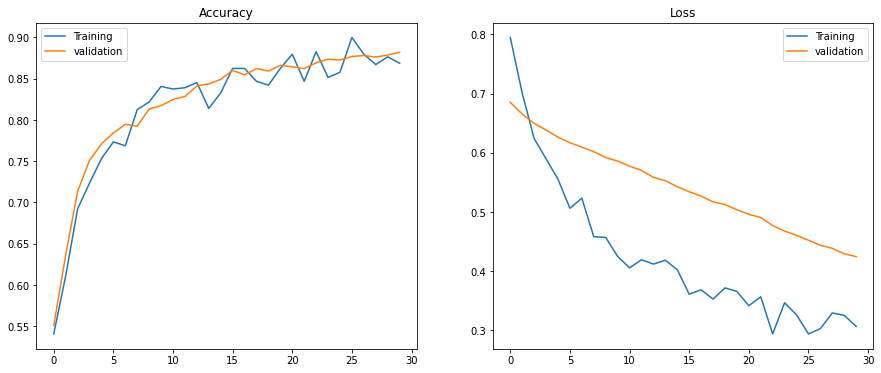

In [10]:

import matplotlib.pyplot as plt
## plot the chart 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist1.epoch,hist1.history['accuracy'],label = 'Training')
plt.plot(hist1.epoch,hist1.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist1.epoch,hist1.history['loss'],label = 'Training')
plt.plot(hist1.epoch,hist1.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()


In [11]:
from keras.models import load_model
import os

from sklearn.metrics import classification_report,confusion_matrix

## Training classification report

train_predictions =  model1.predict(train_generator) 
train_labels = train_generator.classes

train_predictions_rounded_labels=np.argmax(train_predictions, axis=1)

print(classification_report(train_labels,train_predictions_rounded_labels)) 



## validation classification report


validation_predictions = model1.predict(validation_generator)
valid_labels = validation_generator.classes

predictions_rounded_labels=np.argmax(validation_predictions, axis=1)

print(classification_report(valid_labels,predictions_rounded_labels))




368/368 [==============================] - 8374s 23s/step
              precision    recall  f1-score   support

           0       0.49      0.45      0.47     23269
           1       0.51      0.55      0.53     23766

    accuracy                           0.50     47035
   macro avg       0.50      0.50      0.50     47035
weighted avg       0.50      0.50      0.50     47035

46/46 [==============================] - 448s 10s/step
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      2921
           1       0.50      0.54      0.52      2901

    accuracy                           0.50      5822
   macro avg       0.50      0.50      0.50      5822
weighted avg       0.50      0.50      0.50      5822



In [ ]:
batch_size = 128

Y_pred = model.predict(test_generator, 5821 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = ['female','male']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))